### **Daegu Apartment**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Apartemen merupakan salah satu jawaban atas kebutuhan hunian masyarakat modern akibat terbatasnya lahan hunian dan padatnya aktivitas bisnis di perkotaan. Oleh karena itu, akan sangat menarik untuk meneliti harga apartemen yang dipengaruhi oleh berbagai faktor internal dan eksternal.

Individu atau perusahaan biasanya melakukan penawaran apartemen (unit). Penawar dapat menjual unit di sebuah platform dengan menentukan harga apartemen mereka. Dengan begitu cukup sulit bagi pemilik apartemen untuk menyesuaikan dengan harga pasar. Jika harganya terlalu tinggi dibandingkan dengan harga pasar, tentu akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, pemilik akan kesulitan untuk mendapatkan keuntungan yang maksimal.

**Problem Statement**

Salah satu tantangan utama dalam penjualan unit apartemen adalah menentukan harga yang kompetitif dan sesuai pasar di tengah semakin padatnya penawaran dan beragamnya karakteristik properti. Pemilik apartemen memiliki kendali penuh dalam menetapkan harga jual unit mereka, sering kali hanya mengandalkan perbandingan dengan unit serupa di sekitarnya. Padahal, berbagai faktor seperti lokasi, luas bangunan, fasilitas, dan tren pasar sangat memengaruhi nilai apartemen.  **Dengan bertambahnya jumlah unit yang tersedia di pasar, menetapkan harga yang tepat menjadi semakin penting agar penjualan tetap kompetitif tanpa mengorbankan potensi keuntungan.**


**Goals**

Berdasarkan permasalahan tersebut, maka pemilik yang ingin menjual atau melelang perlu sebuah 'Tool' tyang dapat membantu memprediksi harga jual apartemen bagi pemilik atau tuan rumah untuk **menentukan harga jual properti yang tepat untuk tiap properti yang baru akan mereka jual**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti jumlah fasilitas, lokasi dan akses sekitar, tipe properti, tahun pembuatan, serta ukuran  dapat menambah keakuratan prediksi harga sewa, yang mana dapat mendatangkan profit bagi tuan rumah, dan juga tentunya masih terjangkau bagi pembeli.

**Bagi para pemilik apartemen di kota Daegu, prediction tool yang dapat memberikan prediksi harga secara fair tentu dapat meningkatkan jumlah host maupun listing. Dengan kata lain, semakin banyak host dan listing berarti dapat meningkatkan revenue perusahaan, dalam konteks ini didapat dari 'booking charge' baik dari hosts maupun guests.**

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan '**tool**' prediksi harga jual properti yang baru masuk , yang mana akan berguna untuk tuan rumah (host) dalam menentukan harga jual listing-nya.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

# **1.Data Understanding & Load Data**

- Dataset merupakan data harga jual dari apartement di kota Daegu.
- Setiap baris data merepresentasikan informasi terkait properti dan pemiliknya.

**Fitur Dataset Apartemen**

| Nama Fitur                                | Deskripsi                                                                 |
|-------------------------------------------|---------------------------------------------------------------------------|
| **Hallway Type**                          | Tipe lorong atau jenis apartemen berdasarkan desain bangunan             |
| **TimeToSubway**                          | Waktu tempuh menuju stasiun subway terdekat (dalam menit)                |
| **SubwayStation**                         | Nama stasiun subway terdekat                                              |
| **N_FacilitiesNearBy(ETC)**               | Jumlah fasilitas umum lainnya di sekitar apartemen                        |
| **N_FacilitiesNearBy(PublicOffice)**      | Jumlah kantor pemerintahan di sekitar apartemen                           |
| **N_SchoolNearBy(University)**            | Jumlah universitas di sekitar apartemen                                   |
| **N_Parkinglot(Basement)**                | Jumlah tempat parkir bawah tanah (basement) yang tersedia                 |
| **YearBuilt**                             | Tahun pembangunan apartemen selesai                                       |
| **N_FacilitiesInApt**                     | Jumlah fasilitas internal  apartemen                        |
| **Size(sqft)**                            | Luas apartemen dalam satuan square feet (kaki persegi)                    |
| **SalePrice**                             | Harga jual apartemen dalam satuan Won (₩)                                 |


<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\dhika\Documents\Purwadhika Datascience\Part 6 - Machine Learning\Capstone 3\Dataset\data_daegu_apartment.csv")
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Terlihat bahwa tidak terdapat missing values sehingga tidak perlu melakukan imputasi atau melakukan drop pada data yang hilang

In [5]:
hasil = []

for col in df.columns:
    hasil.append({
        'Columns': col,
        'Total Unique Values': df[col].nunique(),
        'Unique Values': df[col].unique()
    })
    
hasil_df = pd.DataFrame(hasil)

pd.set_option('display.max_colwidth', None)
hasil_df

,Columns,Total Unique Values,Unique Values
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


In [6]:
df['YearBuilt'].value_counts().sort_index()

YearBuilt
1978     49
1980      4
1985     51
1986    273
1992    326
1993    451
1997     67
2003      7
2005    502
2006    460
2007    853
2008    203
2009    171
2013    322
2014    292
2015     92
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

1422

Terdapat banyak baris yang duplikat, sehingga diperlukan penghapusan baris yang terduplikasi

In [8]:
df.drop_duplicates(inplace=True)

# **2.Exploratory Data Analysis & Preprocessing Data**

**Distribution of Daegu Apartment price and Cleaning Data from Outliers**

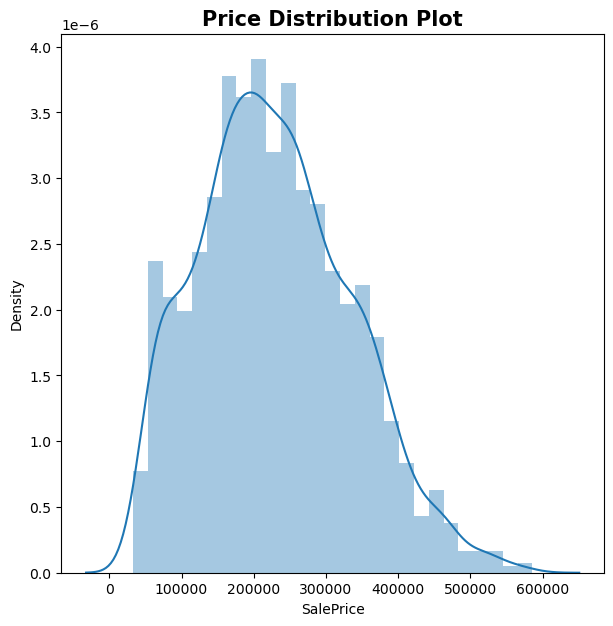

In [9]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold');

In [10]:
from scipy.stats import skew

skew_value = df['SalePrice'].skew()
print(f"Skewness: {skew_value:.2f}")

Skewness: 0.39


Berdasarkan plot distribusi harga di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur price.Hal ini juga dibuktikan oleh nilai skewnessnya dimana nilainya ada diatas 0

In [11]:
from scipy.stats import shapiro
stat, p = shapiro(df['SalePrice'])
print(f"p-value: {p}")

p-value: 1.5368514509784047e-17


Data tidak terdistribusi normal, hal ini disebabkan oleh nilai P value < 0.05. sehingga nantinya pada proses pelatihan dan pemilihan machine learning akan dipilih beberapa metode yang tahan atau robust terhadap data yang tidak terdistribusi secara normal

**Types of property related to price**

In [12]:
# boxplot all 

<Axes: xlabel='HallwayType', ylabel='SalePrice'>

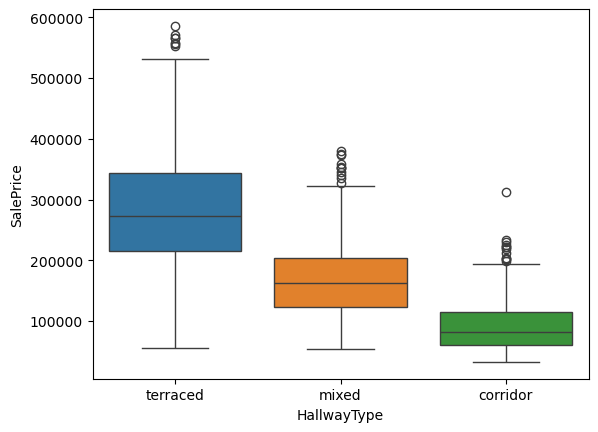

In [13]:
sns.boxplot(data=df, x='HallwayType', y='SalePrice', hue='HallwayType')

Harga jual cenderung lebih tinggi untuk tipe terraced, terlihat bahwa tipe terraced cenderung memiliki luasan yang lebih besar juga, tipe mixed meskipun memiliki luasan yang lebih besar, namun harga jual tetap kalah dengan tipe terraced yang memiliki luasan yang lebih kecil

Karena terdapat beberapa outliers, maka dilakukan handling outliers dengan cara menghapus outliers 

In [14]:
# mencari lower bound dan upperbound untuk kamar tipe terraced
Q1_terraced = df[df['HallwayType'] == 'terraced']['SalePrice'].quantile(0.25)
Q3_terraced = df[df['HallwayType'] == 'terraced']['SalePrice'].quantile(0.75)
iqr_terraced = Q3_terraced - Q1_terraced
lower_bound_terraced = Q1_terraced - 1.5 * iqr_terraced
upper_bound_terraced = Q3_terraced + 1.5 * iqr_terraced
# mencari lower bound dan upperbound untuk kamar tipe mixed
Q1_mixed = df[df['HallwayType'] == 'mixed']['SalePrice'].quantile(0.25)
Q3_mixed = df[df['HallwayType'] == 'mixed']['SalePrice'].quantile(0.75)
iqr_mixed = Q3_mixed - Q1_mixed
lower_bound_mixed = Q1_mixed - 1.5 * iqr_mixed
upper_bound_mixed = Q3_mixed + 1.5 * iqr_mixed
# mencari lower bound dan upperbound untuk kamar tipe corridor
Q1_corridor = df[df['HallwayType'] == 'corridor']['SalePrice'].quantile(0.25)
Q3_corridor = df[df['HallwayType'] == 'corridor']['SalePrice'].quantile(0.75)
iqr_corridor = Q3_corridor - Q1_corridor
lower_bound_corridor = Q1_corridor - 1.5 * iqr_corridor
upper_bound_corridor = Q3_corridor + 1.5 * iqr_corridor

# melakukan filter data dengan menghapus outlier yang melewati upperbound data
df_clean= df[(df['HallwayType'] == 'terraced') & (df['SalePrice'] <= upper_bound_terraced)& (df['SalePrice'] >= lower_bound_terraced)|
                         (df['HallwayType'] == 'mixed') & (df['SalePrice'] <= upper_bound_mixed) & (df['SalePrice'] >= lower_bound_mixed) |
                         (df['HallwayType'] == 'corridor') & (df['SalePrice'] <= upper_bound_corridor)& (df['SalePrice'] >= lower_bound_corridor) ]
df_clean.reset_index(drop='index',inplace=True)
df_clean

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2666,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,137168
2667,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2668,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2669,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


Properti bertipe `terraced` memiliki sales penjualan tertinggi dibandingkan dengan tipe lainnya karena jumlah terjualnya pun paling banyak dibandingkan dengan tipe lainnya

In [15]:
df_clean['HallwayType'].value_counts()

HallwayType
terraced    1660
mixed        687
corridor     324
Name: count, dtype: int64

In [16]:
print(len(df), len(df_clean))


2701 2671


terlihat bahwa 30 data outlier sudah berhasil dihilangkan

In [17]:
# Grouping tipe properti berdasarkan Hallway type
pivot = pd.pivot_table(index='HallwayType',
                       values='SalePrice',
                       aggfunc=['sum','count'],
                       data=df_clean)

pivot.columns=['Total Sales', 'Total Properti']
pivot.sort_values(by='Total Sales', ascending=False, inplace=True)
pivot

,Total Sales,Total Properti
HallwayType,,
terraced,467926798,1660
mixed,113096047,687
corridor,28355511,324


Text(0.5, 1.0, 'Total Sale')

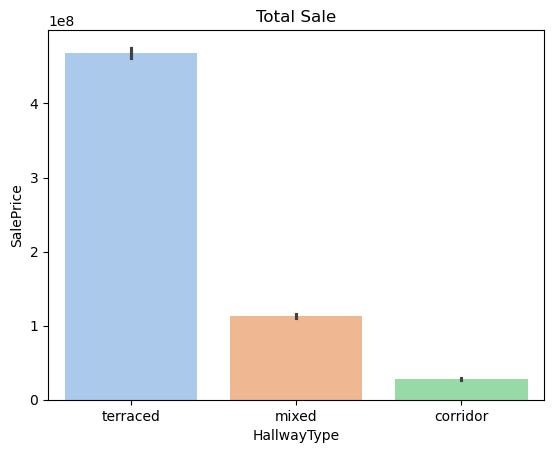

In [18]:
sns.barplot(data=df_clean, 
            x='HallwayType', 
            y='SalePrice',
            estimator='sum', 
            hue='HallwayType', 
            palette='pastel')
plt.title('Total Sale')

In [19]:
pivot_harga =pd.pivot_table(index='HallwayType',
                            values='SalePrice',
                            aggfunc=['sum','count'],
                            data=df_clean)
pivot_harga.columns=['Total Sales', 'Total Unit']
pivot_harga['Proporsi Sales by Sales (%)'] = pivot_harga['Total Sales']/pivot_harga['Total Sales'].sum()*100
pivot_harga['Proporsi Sales by Unit (%)'] = pivot_harga['Total Unit']/pivot_harga['Total Unit'].sum()*100
pivot_harga.sort_values(by='Proporsi Sales by Sales (%)', ascending=False, inplace=True)
pivot_harga

,Total Sales,Total Unit,Proporsi Sales by Sales (%),Proporsi Sales by Unit (%)
HallwayType,,,,
terraced,467926798,1660,76.787564,62.149008
mixed,113096047,687,18.559249,25.720704
corridor,28355511,324,4.653186,12.130288


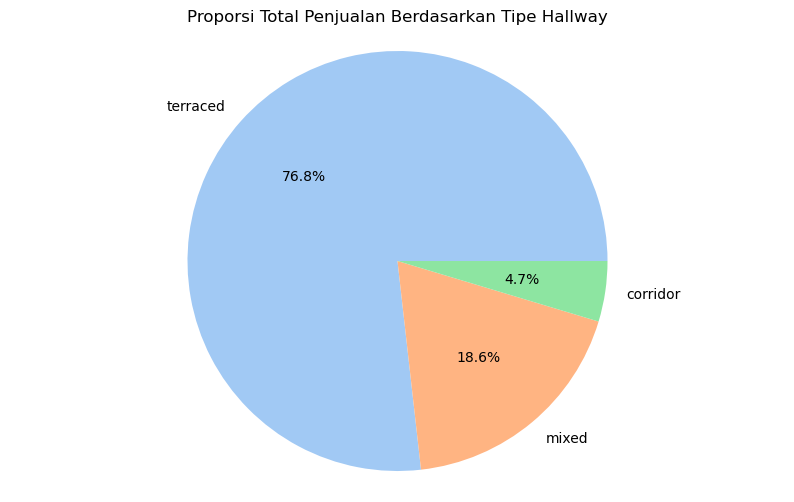

In [20]:
plt.figure(figsize=(10, 6))
plt.pie(pivot_harga['Proporsi Sales by Sales (%)'],
        labels=pivot_harga.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("pastel", len(pivot_harga.index)))

plt.title('Proporsi Total Penjualan Berdasarkan Tipe Hallway')
plt.axis('equal')
plt.show()

Dapat terlihat bahwa proporsi penjualan didominasi oleh tipe terraced secara dominan dari segi pendapatan, kemudian diikuti oleh tipe mixed dan juga corridor

<Axes: xlabel='Size(sqf)', ylabel='SalePrice'>

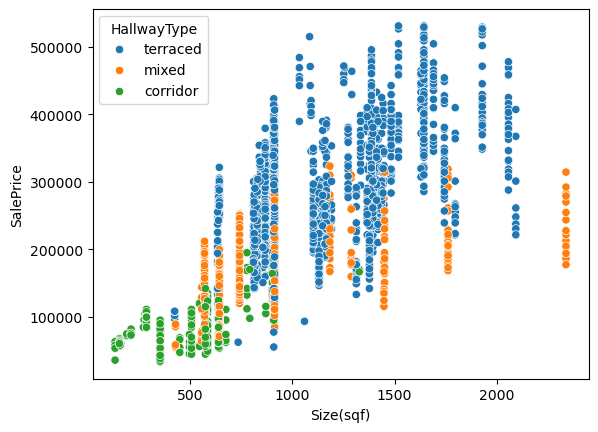

In [21]:
sns.scatterplot(data=df_clean, x='Size(sqf)',y='SalePrice', hue='HallwayType', alpha=1)

Harga jual cenderung lebih tinggi untuk tipe terraced, terlihat bahwa kebanyakan tipe terraced cenderung memiliki luasan yang lebih besar juga dibandingkan dengan tipe mixed dan corridor, tipe mixed meskipun terdapat beberapa yang memiliki luasan yang lebih besar, namun harga jual tetap kalah dengan tipe terraced yang memiliki luasan yang lebih kecil

**Accessibility related to Price**

In [22]:
pivot_subway = pd.pivot_table(index='TimeToSubway',
                               values='SalePrice',
                               aggfunc=['sum', 'count'],
                               data=df_clean)
pivot_subway.columns=['Total Sales', 'Total Unit']
pivot_subway['Proporsi Sales by Sales (%)'] = pivot_subway['Total Sales']/pivot_subway['Total Sales'].sum()*100
pivot_subway['Proporsi Sales by Unit (%)'] = pivot_subway['Total Unit']/pivot_subway['Total Unit'].sum()*100
pivot_subway.sort_values(by='Proporsi Sales by Sales (%)', ascending=False, inplace=True)
pivot_subway

,Total Sales,Total Unit,Proporsi Sales by Sales (%),Proporsi Sales by Unit (%)
TimeToSubway,,,,
0-5min,363266627,1230,59.612657,46.050168
5min~10min,88830291,499,14.577198,18.682142
10min~15min,73349303,434,12.036742,16.248596
15min~20min,61950439,408,10.166170,15.275178
no_bus_stop_nearby,21981696,100,3.607233,3.743916


Penjulaan didominasi oleh waktu tercepat menuju subway, orang orang di daerah daegu cenderung suka terhadap apartemen yang akssibilitas ke subwaynya lebih cepat yaitu 0-5 menit dibanding lainnya

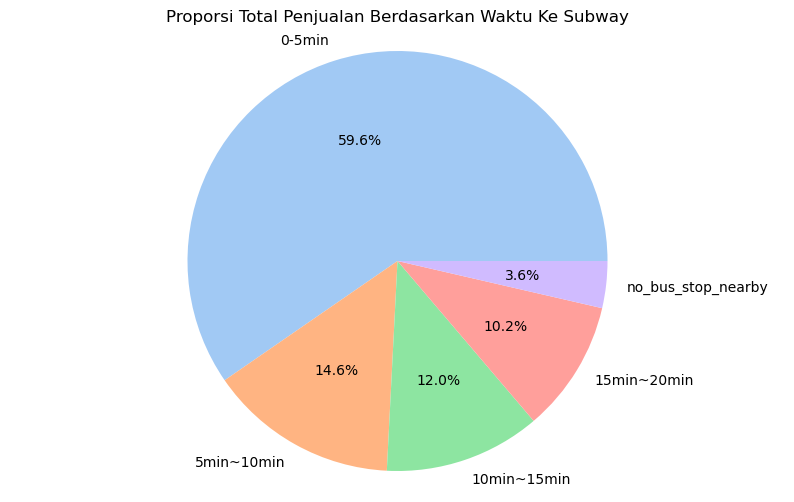

In [23]:
plt.figure(figsize=(10, 6))
plt.pie(pivot_subway['Proporsi Sales by Sales (%)'],
        labels = pivot_subway.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("pastel", len(pivot_subway.index)))
plt.title('Proporsi Total Penjualan Berdasarkan Waktu Ke Subway')
plt.axis('equal')
plt.show()

karena proporsi penjualan condong ke akses waktu 0-5 menit ke subway, maka kita perlu cek tipe seperti apa yang mendominasi disana

In [24]:
# Proporsi Penjualan Berdasarkan Waktu Ke Subway 0-5min 
df_05min_subway = df_clean[df_clean['TimeToSubway'] == '0-5min']
df_05min_subway['HallwayType'].value_counts(2)# df_05min_subway

HallwayType
terraced    0.973171
corridor    0.026829
Name: proportion, dtype: float64

In [73]:
# Proporsi Penjualan Berdasarkan Waktu Ke Subway 0-5min 
df_05min_subway['HallwayType'].value_counts()# df_05min_subway

HallwayType
terraced    1197
corridor      33
Name: count, dtype: int64

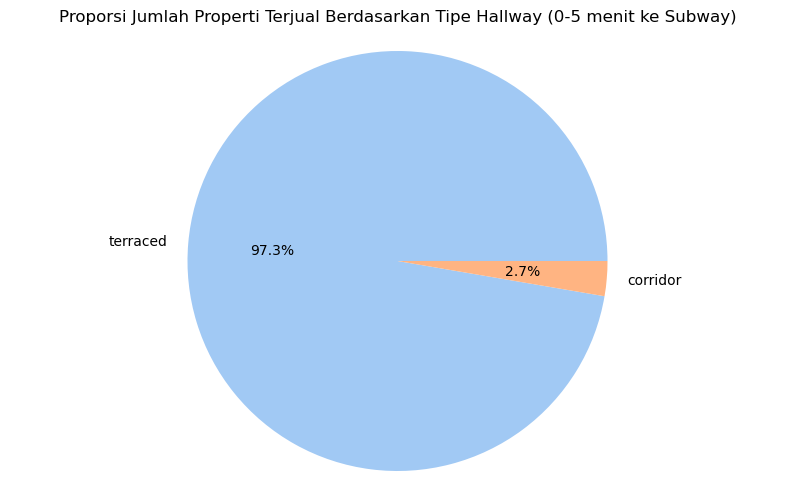

In [25]:
plt.figure(figsize=(10, 6))
plt.pie(df_05min_subway['HallwayType'].value_counts(normalize=True),
        labels=df_05min_subway['HallwayType'].value_counts().index,
        autopct='%1.1f%%',
        colors=sns.color_palette("pastel", len(df_05min_subway['HallwayType'].value_counts().index)))
plt.title('Proporsi Jumlah Properti Terjual Berdasarkan Tipe Hallway (0-5 menit ke Subway)')
plt.axis('equal')
plt.show()

In [26]:
terraced_5min = df_05min_subway[df_05min_subway['HallwayType'] == 'terraced']
total_terraced = df_clean[df_clean['HallwayType'] == 'terraced']
proporsi_terraced_5min = len(terraced_5min) / len(total_terraced)
print(f"Proporsi properti terraced ≤5 menit dari subway: {proporsi_terraced_5min:.2%}")


Proporsi properti terraced ≤5 menit dari subway: 72.11%


Ternyata terlihat bahwa tipe Terraced memiliki penjualan tertinggi pada segmen ini yaitu sebesar 97% dibandingkan dengan corridor. Adapun sebagian besar dari penjualan tipe Terraced juga diperoleh dari daerah ini sebesar 72% di daerah ini untuk keseluruhan tipe terraced. Hal ini dapat menjadi indikasi bahwa tipe Terraced memang cocok untuk menjadi prioritas pemasaran untuk daerah yang waktu ke subwaynya lebih cepat

In [27]:
df_05min_subway['SubwayStation'].value_counts().sort_index()

SubwayStation
Banwoldang               301
Kyungbuk_uni_hospital    384
Myung-duk                212
Sin-nam                  333
Name: count, dtype: int64

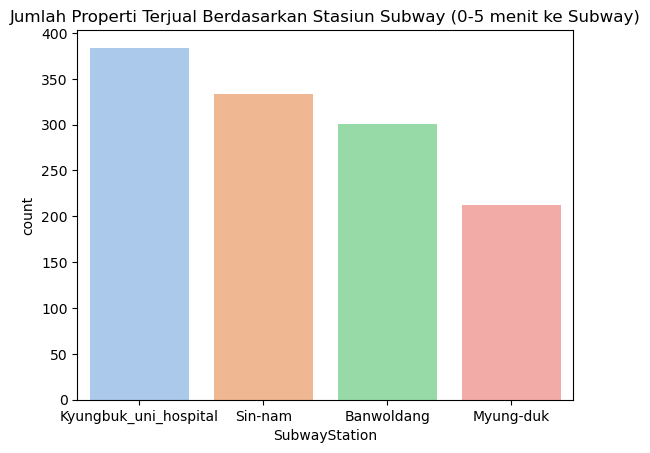

In [28]:
sns.countplot(data=df_05min_subway,x='SubwayStation', palette='pastel')
plt.title('Jumlah Properti Terjual Berdasarkan Stasiun Subway (0-5 menit ke Subway)')
plt.show()

terlihat bahwa sebenarnya stasiun Kyung uni hospital memiliki peminat tertinggi namun jumlahnya tidak terlalu signifikan dibandingkan dengan Sin-Nam dan Banwoldang, Sehingga ini menjadikan indikasi bahwa ke 3 subway station ini tidak terlalu berpengaruh terhadap pemilihan apartemen

**Facilities**

Karena terdapat beberapa jenis tipe fasilitas, maka akan dicari terlebih dahulu korelasi antar variabelnya 

Text(0.5, 1.0, 'Korelasi Antar Fitur Fasilitas')

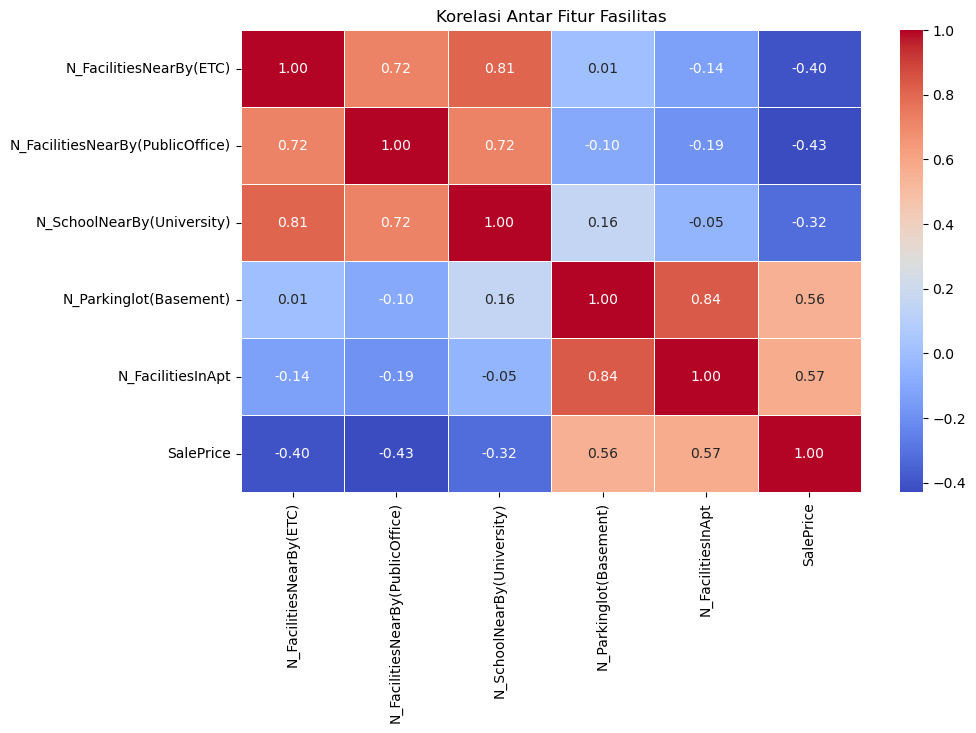

In [29]:
facility_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)', 'N_Parkinglot(Basement)','N_FacilitiesInApt','SalePrice']
corr = df_clean[facility_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur Fasilitas')

**Korelasi Antar Fitur Fasilitas**

**1. Korelasi antar fitur fasilitas**
- `N_FacilitiesNearBy(ETC)` berkorelasi tinggi dengan:
  - `N_SchoolNearBy(University)` = **0.81**
  - `N_FacilitiesNearBy(PublicOffice)` = **0.72**
- `N_Parkinglot(Basement)` sangat berkorelasi dengan:
  - `N_FacilitiesInApt` = **0.84**

**2. Korelasi terhadap `SalePrice`**
- `N_FacilitiesInApt` → korelasi positif sedang (**0.57**)
- `N_Parkinglot(Basement)` → korelasi positif sedang (**0.56**)
- Fasilitas di sekitar apartemen:
  - `ETC` → korelasi negatif sedang (**-0.40**)
  - `PublicOffice` → korelasi negatif sedang (**-0.43**)
  - `University` → korelasi negatif lemah (**-0.32**)

**3. Kesimpulan singkat**
- Fasilitas `N_FacilitiesInApt` lebih berpengaruh terhadap harga jual daripada fasilitas **di sekitar apartemen**.
- Korelasi negatif dari fasilitas sekitar bisa menunjukkan lokasi yang kurang strategis atau apartemen dengan kualitas internal rendah.
- Beberapa fitur sangat berkorelasi satu sama lain → perlu diperhatikan risiko **multikolinearitas** jika digunakan dalam model prediktif seperti regresi. Sehingga diperlukan model yang cukup kuat menangani multicolinearity



Karena `N_facilitiesInApt` memilki korelasi yang terkuat dengan Sale Price, maka `N_facilitiesInApt` akan menjadi acuan dalam EDA bagian ini

In [30]:
df_clean['N_FacilitiesInApt'].value_counts().sort_index()

N_FacilitiesInApt
1      28
2      32
3     341
4     678
5     578
7     381
8     152
9     131
10    350
Name: count, dtype: int64

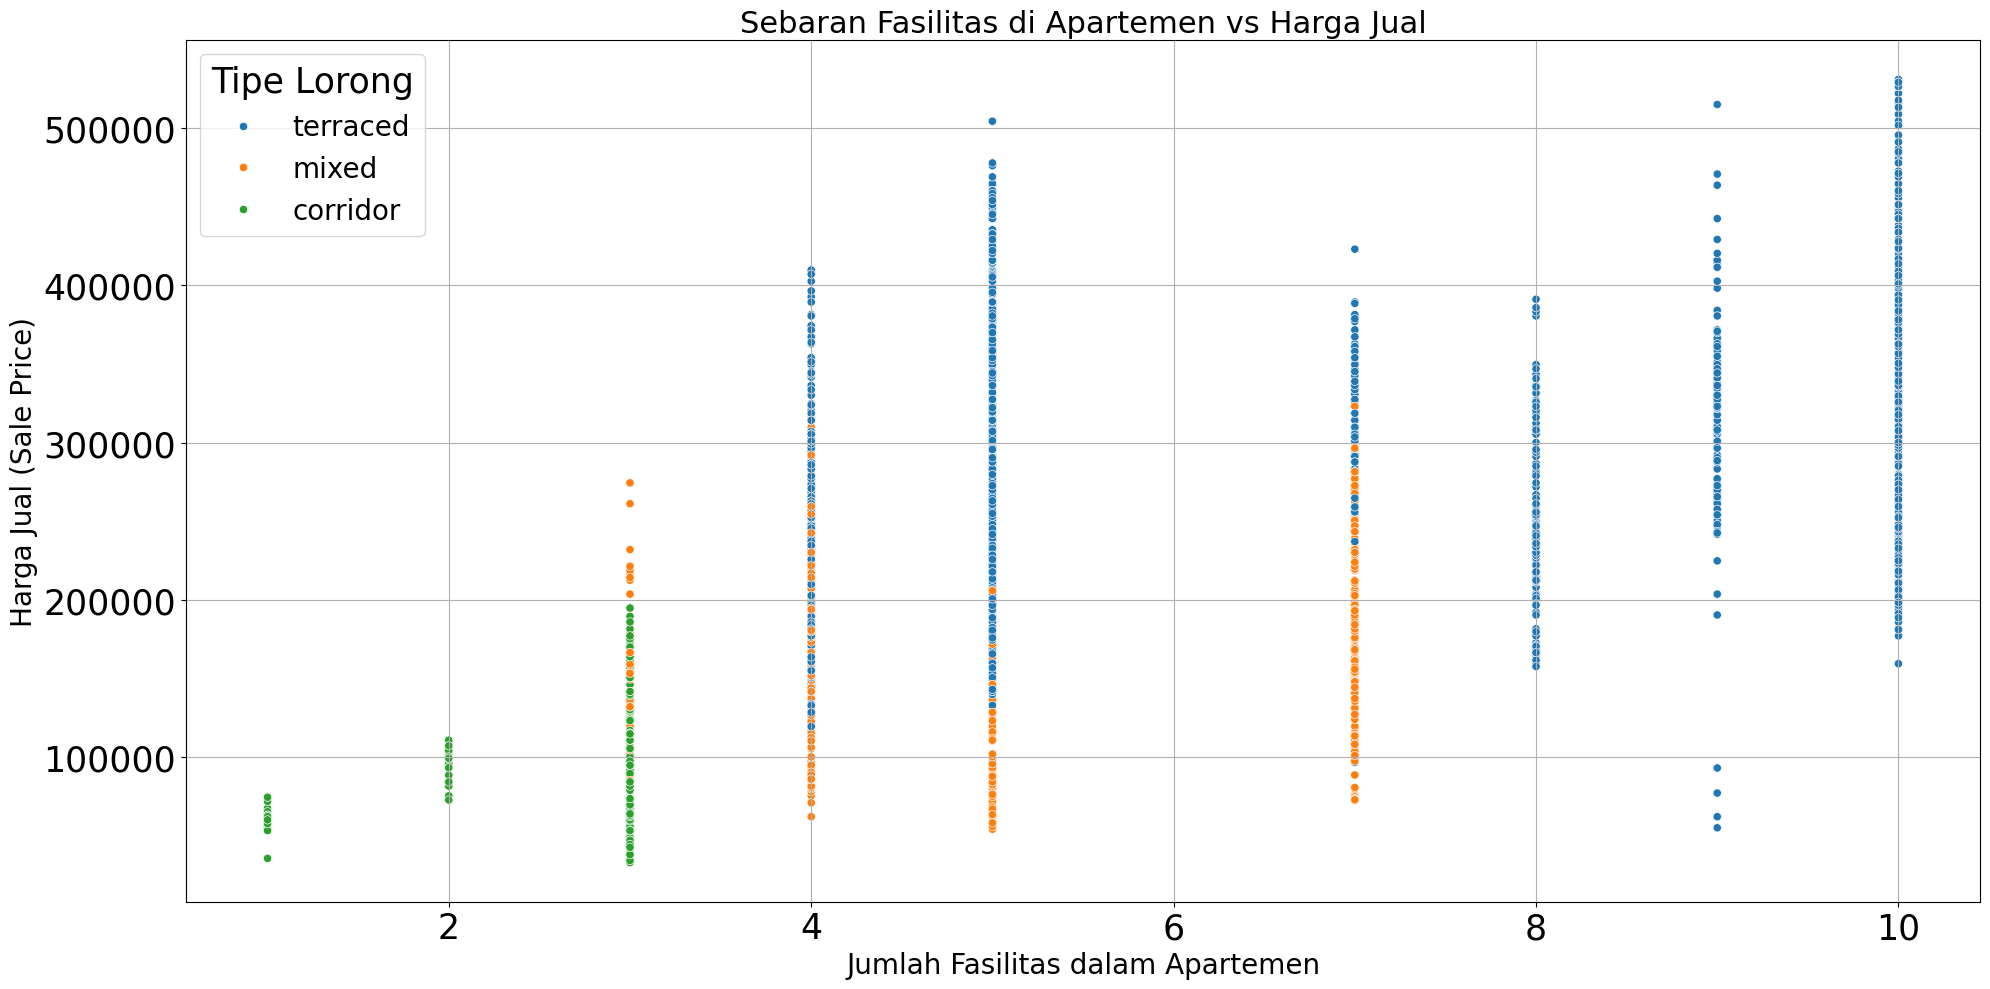

In [82]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_clean, x='N_FacilitiesInApt', y='SalePrice', hue='HallwayType')

# Perbesar ukuran font
ax.set_title('Sebaran Fasilitas di Apartemen vs Harga Jual', fontsize=22)
ax.set_xlabel('Jumlah Fasilitas dalam Apartemen', fontsize=20)
ax.set_ylabel('Harga Jual (Sale Price)', fontsize=20)
ax.tick_params(axis='both', labelsize=25)  # memperbesar angka di sumbu X dan Y
ax.legend(title='Tipe Lorong', fontsize=20, title_fontsize=25)

plt.grid(True)
plt.tight_layout()
plt.show()


Untuk jumlah fasilitas yang ada di dalam apartemennya, terlihat bahwa tipe terraced memang memiliki jumlah fasilitas yang cenderung lebih banyak dibandingkan dengan jenis lainnya, artinya untuk tipe terraced, selain aksesnya yang dekat dan cepat ke stasiun, maka jumlah fasilitas di dalam apartemennya juga memiliki pengaruh positif terhadap harga

# **3.Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sudah dibersihkan sebelumnya.

In [32]:
# Membuat duplikasi dataframe
df_model = df_clean.copy()

In [33]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[10min~15min, 15min~20min]"
2,SubwayStation,object,0,0.0,8,"[Daegu, Chil-sung-market]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[1.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[2.0, 4.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 3.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[184.0, 203.0]"
7,YearBuilt,int64,0,0.0,16,"[1986, 1993]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[10, 9]"
9,Size(sqf),int64,0,0.0,89,"[640, 814]"


Dari info dataset di atas, tidak terdapat data yang kosong pada fitur atau kolom.

In [34]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,1.890678,4.025833,2.676151,534.100711,2002.486709,5.720329,978.464994,228146.146013
std,2.150349,1.892150,1.504907,417.320710,9.041628,2.380483,387.301322,103920.216115
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,152433.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,219911.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,298008.500000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,530973.000000


In [35]:
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2671 non-null   object 
 1   TimeToSubway                      2671 non-null   object 
 2   SubwayStation                     2671 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2671 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2671 non-null   float64
 5   N_SchoolNearBy(University)        2671 non-null   float64
 6   N_Parkinglot(Basement)            2671 non-null   float64
 7   YearBuilt                         2671 non-null   int64  
 8   N_FacilitiesInApt                 2671 non-null   int64  
 9   Size(sqf)                         2671 non-null   int64  
 10  SalePrice                         2671 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 229.7+ KB


**Data Correlation**

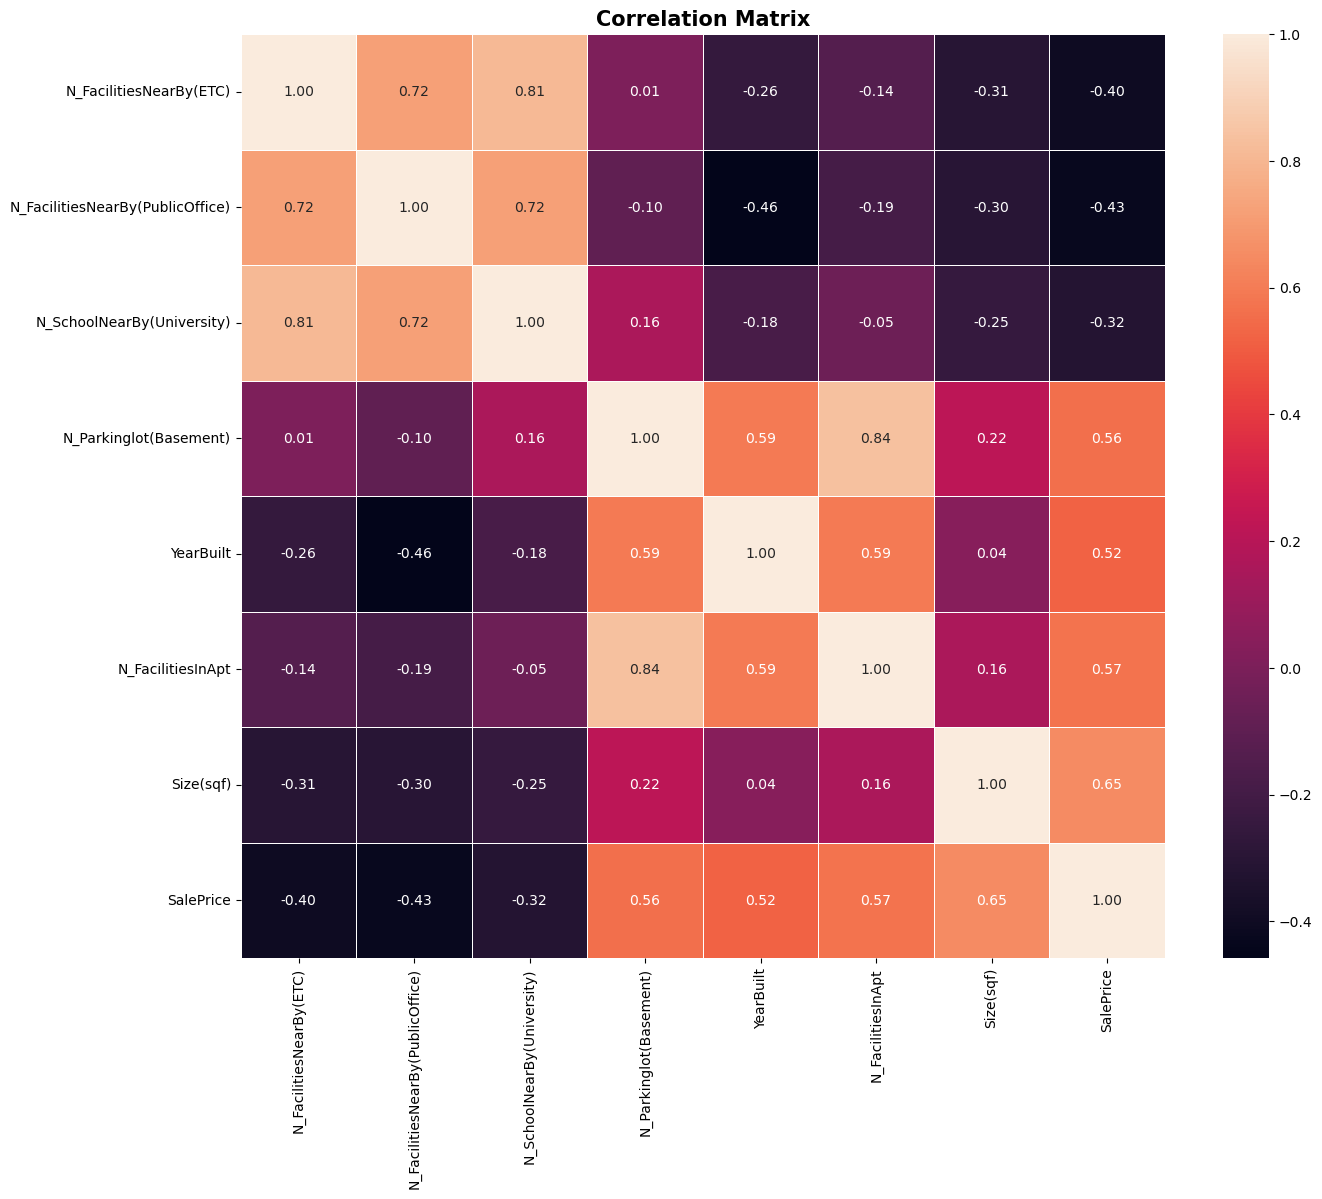

In [36]:
# Correlation matrix
plt.figure(figsize=(15, 12))
corr = df_model[num_features].corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

**Analisis Korelasi Antar Fitur**
1. Korelasi tinggi antar fitur (indikasi multikolinearitas)
- `N_FacilitiesNearBy(ETC)` vs `N_SchoolNearBy(University)` = **0.81**
- `N_FacilitiesNearBy(ETC)` vs `N_FacilitiesNearBy(PublicOffice)` = **0.72**
- `N_Parkinglot(Basement)` vs `N_FacilitiesInApt` = **0.84**
- `N_Parkinglot(Basement)` vs `YearBuilt` = **0.59**
- `N_FacilitiesInApt` vs `YearBuilt` = **0.59**

Fitur-fitur tersebut memiliki informasi yang sangat mirip dan berpotensi menyebabkan redundansi.

2. Fitur dengan korelasi tinggi terhadap `SalePrice`
- `Size(sqf)` = **0.65**
- `N_FacilitiesInApt` = **0.57**
- `N_Parkinglot(Basement)` = **0.56**
- `YearBuilt` = **0.52**

Fitur-fitur ini merupakan prediktor yang kuat terhadap harga jual apartemen.

3. Fitur dengan korelasi negatif terhadap `SalePrice`
- `N_FacilitiesNearBy(PublicOffice)` = **-0.43**
- `N_FacilitiesNearBy(ETC)` = **-0.40**
- `N_SchoolNearBy(University)` = **-0.32**

Menunjukkan bahwa kedekatan dengan fasilitas publik tidak selalu meningkatkan harga jual — kemungkinan karena lokasi padat fasilitas justru berkaitan dengan apartemen lama atau kualitas bangunan yang lebih rendah.

4. Implikasi terhadap modeling
- Untuk model linear seperti regresi: pertimbangkan untuk menghapus fitur yang saling berkorelasi kuat untuk menghindari multikolinearitas.
- Untuk model tree-based dan ensemble learning seperti Random Forest, XGBoost dll cukup baik dalam menangani multicolinearity, sehingga pada kasus kali ini akan dipilih dan diutamakan adalah model ensemble learning


**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

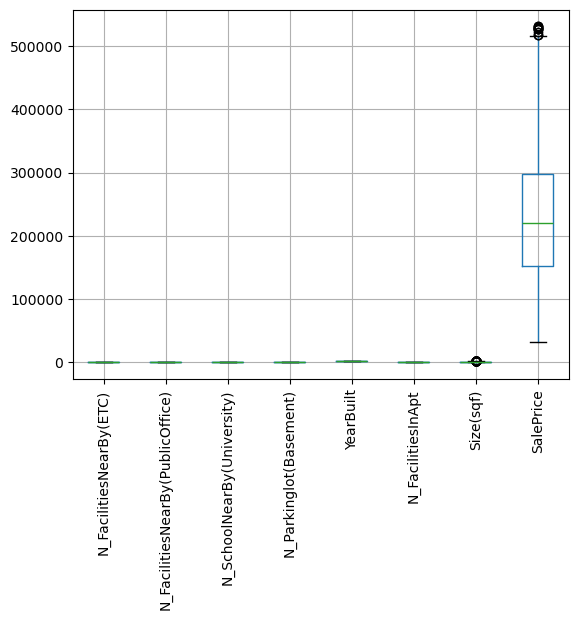

In [37]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

**Clean Dataset**

In [38]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [39]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2671 non-null   object 
 1   TimeToSubway                      2671 non-null   object 
 2   SubwayStation                     2671 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2671 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2671 non-null   float64
 5   N_SchoolNearBy(University)        2671 non-null   float64
 6   N_Parkinglot(Basement)            2671 non-null   float64
 7   YearBuilt                         2671 non-null   int64  
 8   N_FacilitiesInApt                 2671 non-null   int64  
 9   Size(sqf)                         2671 non-null   int64  
 10  SalePrice                         2671 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 229.7+ KB


Pada akhirnya, tersisa 23866 baris data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 50% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [40]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [41]:
df_model[num_features].columns

Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [42]:
df_model.columns
cat_features = ['HallwayType', 'SubwayStation', 'TimeToSubway']

In [43]:
hasil = []

for col in df_clean.columns:
    hasil.append({
        'Columns': col,
        'Total Unique Values': df_clean[col].nunique(),
        'Unique Values': df_clean[col].unique()
    })
    
hasil_df = pd.DataFrame(hasil)

pd.set_option('display.max_colwidth', None)
hasil_df

,Columns,Total Unique Values,Unique Values
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


**Data Splitting**

In [44]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

**Train and Test Splitting**

In [45]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=0)

**Preprocessing Transformer**

In [46]:
cat_features = ['HallwayType', 'SubwayStation', 'TimeToSubway']

In [47]:
num_features_scale = ['N_Parkinglot(Basement)','YearBuilt', 'Size(sqf)']

In [48]:
for i in num_features_scale:
    num_features.remove(i)
num_features.remove('SalePrice')
num_features

['N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_FacilitiesInApt']

In [49]:
# Mengubah fitur kategorikal menjadi numerikal
# num_transform = Pipeline([
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False))  # ini dia!
# ])

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), cat_features),
    ('Scaler', StandardScaler(), num_features_scale)
    # ('Num Trans',num_transform,num_features)
], remainder='passthrough')

In [50]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['HallwayType', 'SubwayStation',
                                  'TimeToSubway']),
                                ('Scaler', StandardScaler(),
                                 ['N_Parkinglot(Basement)', 'YearBuilt',
                                  'Size(sqf)'])])

**Choose a Benchmark Model**

In [51]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ada = AdaBoostRegressor(random_state=1)
grad = GradientBoostingRegressor(random_state=1)
supvr = SVR()


# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_grad = TransformedTargetRegressor(grad, func=np.log, inverse_func=np.exp)
log_supvr = TransformedTargetRegressor(supvr, func=np.log, inverse_func=np.exp)
# Scaling data


# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_ada, log_grad,log_supvr]
# models = [lr, knn, dt, rf, xgb]


score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise' 
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-52484.98635993 -51769.11909556 -51634.41882443 -47999.60177942
 -55287.46114342] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42048.74149491 -40762.58500193 -40766.71447718 -38050.03962305
 -43321.09055249] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.20351034 -0.21925967 -0.19645323 -0.19870177 -0.21589436] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-48649.37524293 -45694.60493393 -47526.24945812 -48597.22028449
 -49506.71769283] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-38108.23218707 -35769.68931275 -36592.93045379 -38613.06347129
 -38322.58207061] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [52]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor','Adaboost Regressor', 'GradientBoosting Regressor', 'SVR'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-51835.117441,2327.952867,-40989.834230,1749.277428,-0.206764,0.009180
1,KNN Regressor,-47994.833522,1310.550343,-37481.299499,1104.581336,-0.195279,0.009442
2,DecisionTree Regressor,-44437.000857,1417.396295,-35342.231023,935.898694,-0.177789,0.004704
3,RandomForest Regressor,-44430.328193,1402.818764,-35339.101804,925.709891,-0.177870,0.004689
4,XGBoost Regressor,-44426.937979,1391.609476,-35320.089998,920.807719,-0.177647,0.004731
5,Adaboost Regressor,-53242.152424,2052.489493,-42172.569330,1632.716984,-0.202731,0.004559
6,GradientBoosting Regressor,-44281.130447,1258.956581,-35263.863341,1009.801476,-0.177190,0.004989
7,SVR,-45526.877343,1203.490612,-35942.497607,918.043380,-0.181669,0.004938


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE dan MAE dan MAPE, Gradboosting adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 1 benchmark model terbaik, yaitu Gradboost. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Gradboost dan XGBoost

In [95]:
# Benchmark 2 model terbaik
models_benchmark = {
    'Grad': GradientBoostingRegressor(random_state=42),
    'XGB': XGBRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models_benchmark:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models_benchmark[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models_benchmark.keys())
score_before_tuning

,RMSE,MAE,MAPE
Grad,48566.012311,39333.243739,0.195183
XGB,49345.627874,39905.279388,0.198554


- Ketika dilakukan prediksi pada test set, performa GradientBoosting secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE dan MAPE yang sedikit lebih rendah dari XGBoost.


**Hyperparameter Tuning**

Karena model GradBoosting memiliki performa yang sedikit lebih baik dari XGBoost, maka selanjutnya kita akan menggunakan model GradBoosting ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model GradBoosting dengan harapan dapat meningkatkan performa model.

In [54]:
# Kedalaman pohon
max_depth = list(np.arange(1, 21,2))

# Learning rate
learning_rate = list(np.arange(10, 101,10)/1000)

# Jumlah pohon
n_estimators = list(np.arange(1000, 2001,100))

# Persentase data yang digunakan per pohon
subsample = list(np.arange(2, 10)/10)

# Max leaf nodes
max_leaf_nodes = list(np.arange(1, 11))

# Impurity threshold minimum untuk split
min_impurity_decrease = list(np.arange(0, 1.1, 0.1))  

# Jumlah feature untuk tiap split
max_features = list(np.arange(0.1, 1.0, 0.1))+['sqrt','log2','auto']  # 10%–90% dari total fitur

# Hyperparam space untuk Gradient Boosting Regressor

robust = RobustScaler()
standard = StandardScaler()
minmax = MinMaxScaler()

hyperparam_space_gbr = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_leaf_nodes': max_leaf_nodes,
    'model__min_impurity_decrease': min_impurity_decrease,
    'model__max_features': max_features,
    'preprocessing__Scaler':[robust,standard,minmax]
}


In [55]:
# Benchmark model dengan hyperparameter tuning
grad = GradientBoostingRegressor(random_state=42, verbose=0)


# Membuat algorithm chains
estimator_grad = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', grad)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_grad = RandomizedSearchCV(
    estimator_grad, 
    param_distributions = hyperparam_space_gbr,
    n_iter = 250,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42
)

In [56]:
# Fitting data training untuk mencari parameter terbaik
random_grad.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'SubwayStation',
                                                                                'TimeToSubway']),
                                                                              ('Scaler',
                                                                               StandardScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'Size(sqf)'])])),
                                             ('model',
                                              Gra...
                                        'model__n_estimators': [1000, 1100,
                                                                1200, 1300,
                                                                1400, 1500,
                                                                1600, 1700,
                                                                1800, 1900,
                                                                2000],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9],
                                        'preprocessing__Scaler': [RobustScaler(),
                                                                  StandardScaler(),
                                                                  MinMaxScaler()]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [57]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_grad.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__Scaler,param_model__subsample,param_model__n_estimators,param_model__min_impurity_decrease,param_model__max_leaf_nodes,param_model__max_features,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
155,8.061722,0.367265,0.076119,0.011382,StandardScaler(),0.8,1800,0.3,6,0.3,...,2097.029117,7,-0.192139,-0.179978,-0.188961,-0.183284,-0.181493,-0.185171,0.004625,83
39,8.336861,0.323306,0.064273,0.004211,RobustScaler(),0.8,1800,0.1,4,0.5,...,2055.638778,6,-0.192214,-0.180057,-0.188444,-0.182788,-0.181363,-0.184973,0.004614,57
194,1.911335,0.037885,0.022440,0.000596,StandardScaler(),0.9,1200,0.3,6,log2,...,2076.339349,5,-0.192003,-0.179282,-0.188620,-0.183372,-0.181140,-0.184883,0.004740,52
164,4.435916,0.074334,0.057493,0.004669,RobustScaler(),0.7,1100,0.3,5,0.2,...,2176.845384,46,-0.192891,-0.180767,-0.189500,-0.183468,-0.182404,-0.185806,0.004610,116
249,1.844338,0.042814,0.020629,0.001422,StandardScaler(),0.9,1400,0.8,5,0.1,...,2075.424949,1,-0.191183,-0.178833,-0.188230,-0.182965,-0.180563,-0.184355,0.004657,2


In [58]:
# Cek skor dan params terbaik
print('GradBoost')
print('Best_score:', random_grad.best_score_)
print('Best_params:', random_grad.best_params_)

GradBoost
Best_score: -44172.29977687092
Best_params: {'preprocessing__Scaler': StandardScaler(), 'model__subsample': 0.8, 'model__n_estimators': 1800, 'model__min_impurity_decrease': 0.30000000000000004, 'model__max_leaf_nodes': 6, 'model__max_features': 0.30000000000000004, 'model__max_depth': 7, 'model__learning_rate': 0.01}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model GradBoosting dan hyperparameter terpilih.

In [59]:
# Model GradBoosting
model = {'Grad': GradientBoostingRegressor(random_state=42)}

# Define model terhadap estimator terbaik
grad_tuning = random_grad.best_estimator_

# Fitting model
grad_tuning.fit(X_train, y_train)

# Predict test set
y_pred_grad_tuning = grad_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_grad_tuning = np.sqrt(mean_squared_error(y_test, y_pred_grad_tuning))
mae_grad_tuning = mean_absolute_error(y_test, y_pred_grad_tuning)
mape_grad_tuning = mean_absolute_percentage_error(y_test, y_pred_grad_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_grad_tuning, 'MAE': mae_grad_tuning, 'MAPE': mape_grad_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
Grad,48839.993243,39424.042247,0.195126


**Performance Comparison**

Perbandingan performa model GradBoosting sebelum dan sesudah dilakukan hyperparameter tuning.

In [60]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['Grad']).T

,RMSE,MAE,MAPE
Grad,48566.012311,39333.243739,0.195183


In [61]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
Grad,48839.993243,39424.042247,0.195126


Model tidak mengalami peningkatan performa yan berarti (nilai MAPE berkurang namun pada metriks RMSE dan MAE mengalami peningkatan) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 48566, 39333, 0.19518
- RMSE, MAE & MAPE setelah tuning: 48839, 39424, 0.19512

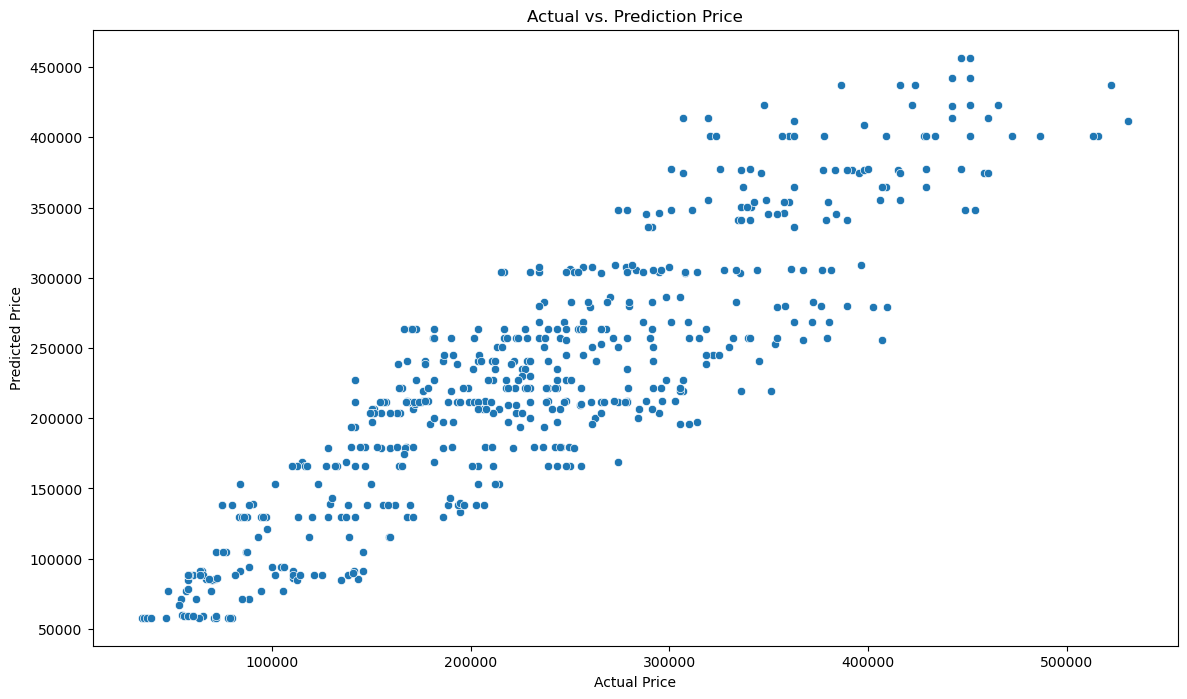

In [92]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_grad_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

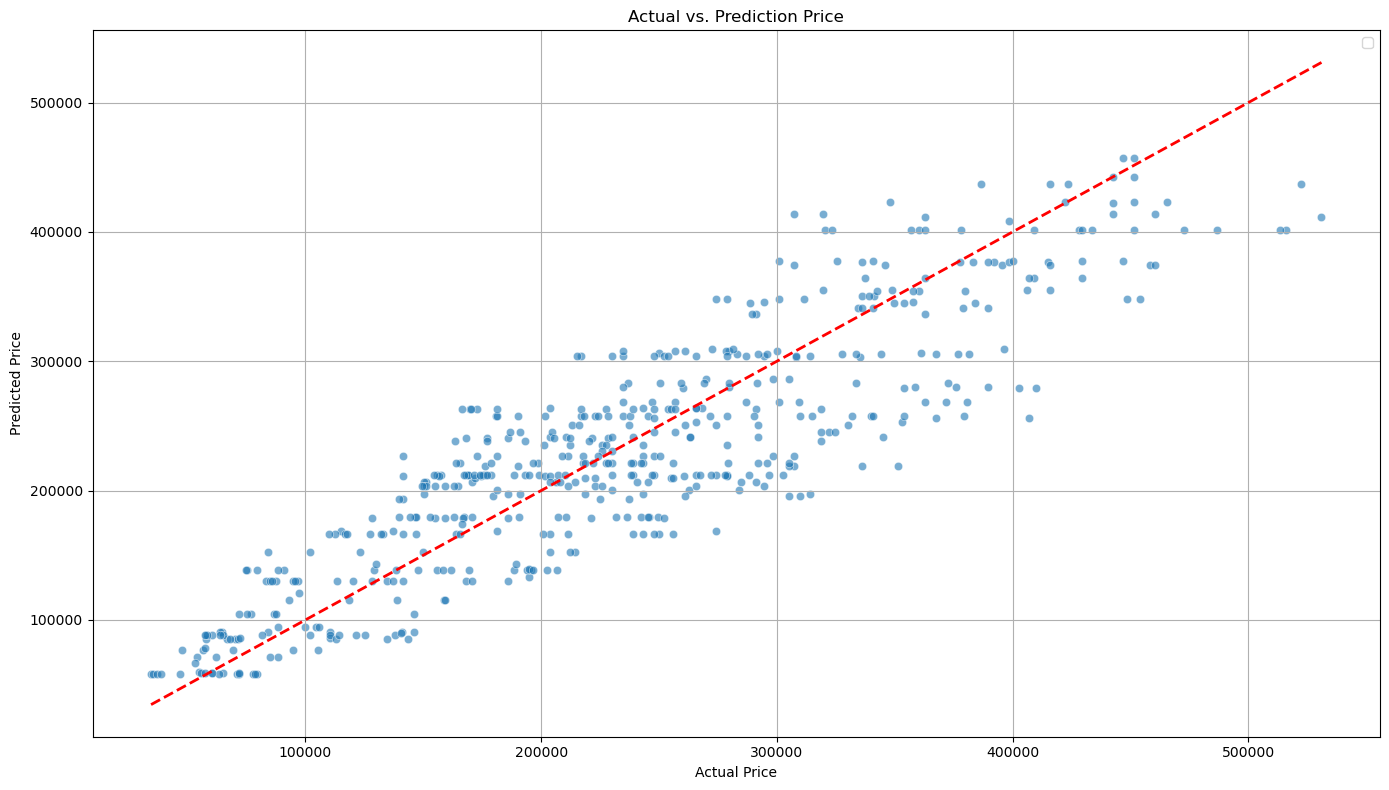

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Scatter plot
sns.scatterplot(x=y_test, y=y_pred_grad_tuning, alpha=0.6)

# Tambahkan garis y = x (prediksi sempurna)
min_val = min(min(y_test), min(y_pred_grad_tuning))
max_val = max(max(y_test), max(y_pred_grad_tuning))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 19% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

In [63]:
transformer.get_feature_names_out()

array(['One Hot__HallwayType_mixed', 'One Hot__HallwayType_terraced',
       'One Hot__SubwayStation_Banwoldang',
       'One Hot__SubwayStation_Chil-sung-market',
       'One Hot__SubwayStation_Daegu',
       'One Hot__SubwayStation_Kyungbuk_uni_hospital',
       'One Hot__SubwayStation_Myung-duk',
       'One Hot__SubwayStation_Sin-nam',
       'One Hot__SubwayStation_no_subway_nearby',
       'One Hot__TimeToSubway_10min~15min',
       'One Hot__TimeToSubway_15min~20min',
       'One Hot__TimeToSubway_5min~10min',
       'One Hot__TimeToSubway_no_bus_stop_nearby',
       'Scaler__N_Parkinglot(Basement)', 'Scaler__YearBuilt',
       'Scaler__Size(sqf)', 'remainder__N_FacilitiesNearBy(ETC)',
       'remainder__N_FacilitiesNearBy(PublicOffice)',
       'remainder__N_SchoolNearBy(University)',
       'remainder__N_FacilitiesInApt'], dtype=object)

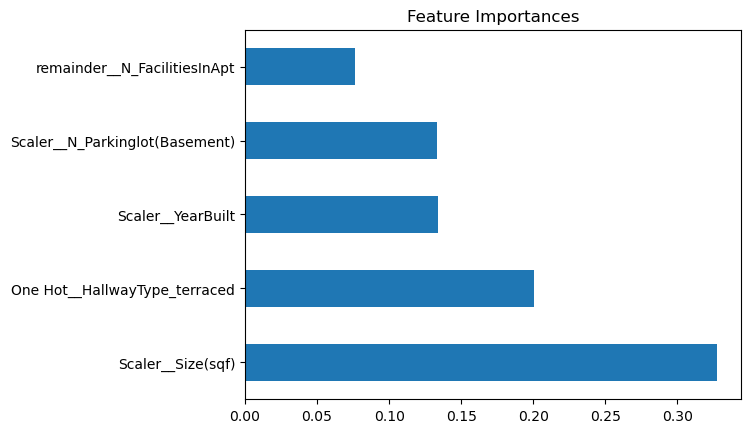

In [83]:
# Plot feature importances
feature_imp = pd.Series(grad_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(5)
feature_imp.plot(kind='barh', title='Feature Importances');

#### **Shap**

In [85]:
import shap

In [87]:
X_test = X_test  
X_test_transformed = grad_tuning[:-1].transform(X_test)
explainer = shap.Explainer(grad_tuning.named_steps['model'])
shap_values = explainer(X_test_transformed)

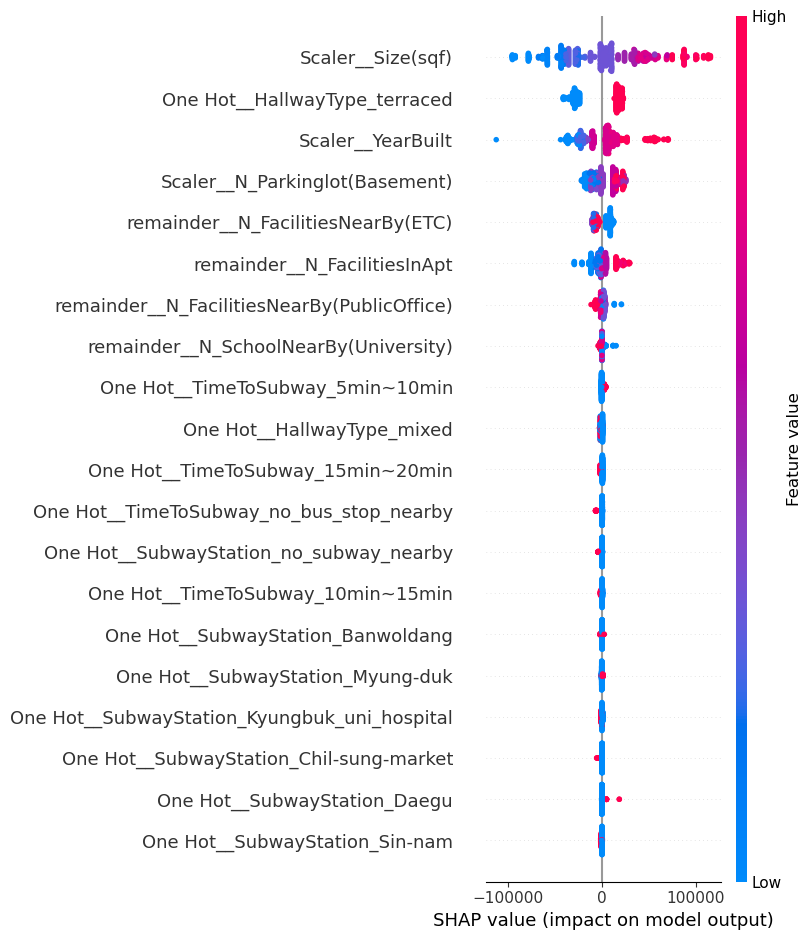

In [88]:
feature_names = grad_tuning.named_steps['preprocessing'].get_feature_names_out()
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur `Size(sqf)`,`HallwayType`, `YearBuilt`,`N_facilitiesinApt`, dan `ParkingLot` menjadi fitur yang paling berpengaruh terhadap `SalePrice`.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~19%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga di Daegu City pada rentang nilai seperti yang dilatih terhadap model (maksimal harga 530973 Won), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 19% dari harga seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek lain seperti jumlah tempat makan sekitar, kemaanan, dan lain-lain.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah penjualan apartemen. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

### **Recommendations**

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya listing jika dibandingkan dengan pengguna yang menentukan `Sale Price` propertinya sendiri.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('Sale Price'), terutama pada fitur fitur yang berkaitan dengan kenyamanan pengguna dalam tinggal di apartement seperti jarak ke pusat kota, kebisingan, akses makanan dan lainnya. Selain itu, adanya penambahan data yang bervariasi pada Daegu Apartment tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
2. Jika ada penambahan banyak data, Terlebih lagi banyak sekali data yang terduplikasi pada dataset ini sehingga mengurangi sebagian besar data. kemudian jika data dirasa sudah cukup banyak dapat dicoba dengan menggunakan model yang lebih kompleks, seperti neural networks (NN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
3. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga apartemen dalam beberapa tahun kedepan. Model prediksi semacam ini nantinya sangat berguna untuk membantu pengguna dalam menakar kenaikan harga jual dari properti miliknya.

****

#### **Save Model**

In [ ]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', grad())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Airbnb_XGB.sav', 'wb'))

In [66]:
# Load model
# filename = 'Model_Airbnb_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [67]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

In [70]:
import joblib
# best model
grboost_tuning = random_grad.best_estimator_


# fit
grboost_tuning.fit(X, y)

# save model
joblib.dump(grboost_tuning, 'model_grboost_Capstone3_joblib')

['model_grboost_Capstone3_joblib']

In [71]:
grboost_tuning = joblib.load('model_grboost_Capstone3_joblib')
grboost_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType',
                                                   'SubwayStation',
                                                   'TimeToSubway']),
                                                 ('Scaler', StandardScaler(),
                                                  ['N_Parkinglot(Basement)',
                                                   'YearBuilt',
                                                   'Size(sqf)'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=7,
                                           max_features=0.30000000000000004,
                                           max_leaf_nodes=6,
                                           min_impurity_decrease=0.30000000000000004,
                                           n_estimators=1800, random_state=42,
                                           subsample=0.8))])